In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

- 1.age in years
- 2.sex - (1 = male; 0 = female)
- 3.cp - chest pain type
- 4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- 5.chol - serum cholestoral in mg/dl
- 6.fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
- 7.restecg - resting electrocardiographic results
- 8.thalach - maximum heart rate achieved
- 9.exang - exercise induced angina (1 = yes; 0 = no)
- 10.oldpeak - ST depression induced by exercise relative to rest
- 11.slope - the slope of the peak exercise ST segment
- 12.ca - number of major vessels (0-3) colored by flourosopy
- 13.thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- 14.target - 1 or 0

In [2]:
df = pd.read_csv('../data/heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
(303, 14)


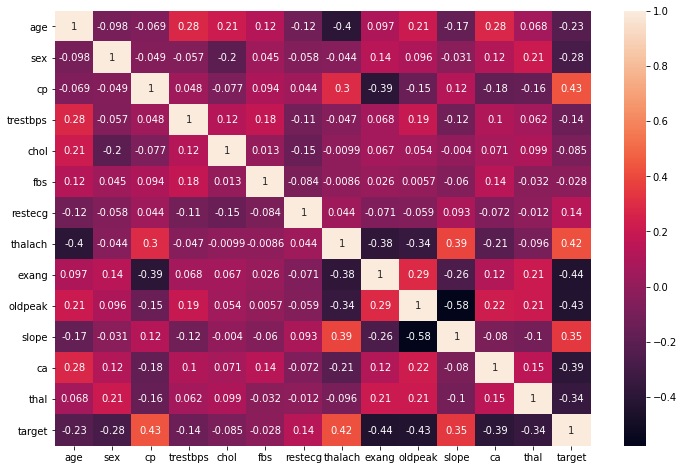

In [4]:
#Correlation table in order to check parameter influence on problems with heart
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [5]:
#Data Cleaning

df['target'] = df['target'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['exang'] = df['exang'].apply(lambda x: 'Yes' if x == 1 else 'No')
age_bin = [25, 35, 45, 55, 65, 75, 85]
df['age'] = pd.cut(df['age'], age_bin)
df['cp'] = df['cp'].apply(lambda x: 'Typical Angina' if x == 1 else 
                          'Atypical Angina' if x == 2 else 
                          'Non-anginal Pain' if x == 3 else 
                          'Asymptomatic')
df['fbs'] = df['fbs'].apply(lambda x: 'Lower than 120mg/ml' if x == 0 else 'Higher than 120mg/ml')
df['restecg'] = df['restecg'].apply(lambda x: 'Normal' if x == 0 else 
                                    'ST-T wave abnormality' if x == 1 else
                                    'left ventricular hypertrophy')
df['sex'] = df['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
df['slope'] = df['slope'].apply(lambda x: 'Upsloping' if x == 0 else 'Flat' if x == 1 else 'Downsloping')
df['thal'] = df['thal'].apply(lambda x: 'Normal' if x == 1 else 'Fixed Defect' if x == 2 else 'Reversable Defect')
df.rename(columns={'target': 'heart_problem'}, inplace=True)

In [6]:
#Preprocessed DF
print(df)
print(df.info())

          age     sex                cp  trestbps  chol                   fbs  \
0    (55, 65]    Male  Non-anginal Pain       145   233  Higher than 120mg/ml   
1    (35, 45]    Male   Atypical Angina       130   250   Lower than 120mg/ml   
2    (35, 45]  Female    Typical Angina       130   204   Lower than 120mg/ml   
3    (55, 65]    Male    Typical Angina       120   236   Lower than 120mg/ml   
4    (55, 65]  Female      Asymptomatic       120   354   Lower than 120mg/ml   
..        ...     ...               ...       ...   ...                   ...   
298  (55, 65]  Female      Asymptomatic       140   241   Lower than 120mg/ml   
299  (35, 45]    Male  Non-anginal Pain       110   264   Lower than 120mg/ml   
300  (65, 75]    Male      Asymptomatic       144   193  Higher than 120mg/ml   
301  (55, 65]    Male      Asymptomatic       130   131   Lower than 120mg/ml   
302  (55, 65]  Female    Typical Angina       130   236   Lower than 120mg/ml   

                   restecg 

<ipython-input-7-b487130343fa>:23: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(proportion.iloc[:, 1], autopct='%1.1f%%', shadow = True, explode = explode)


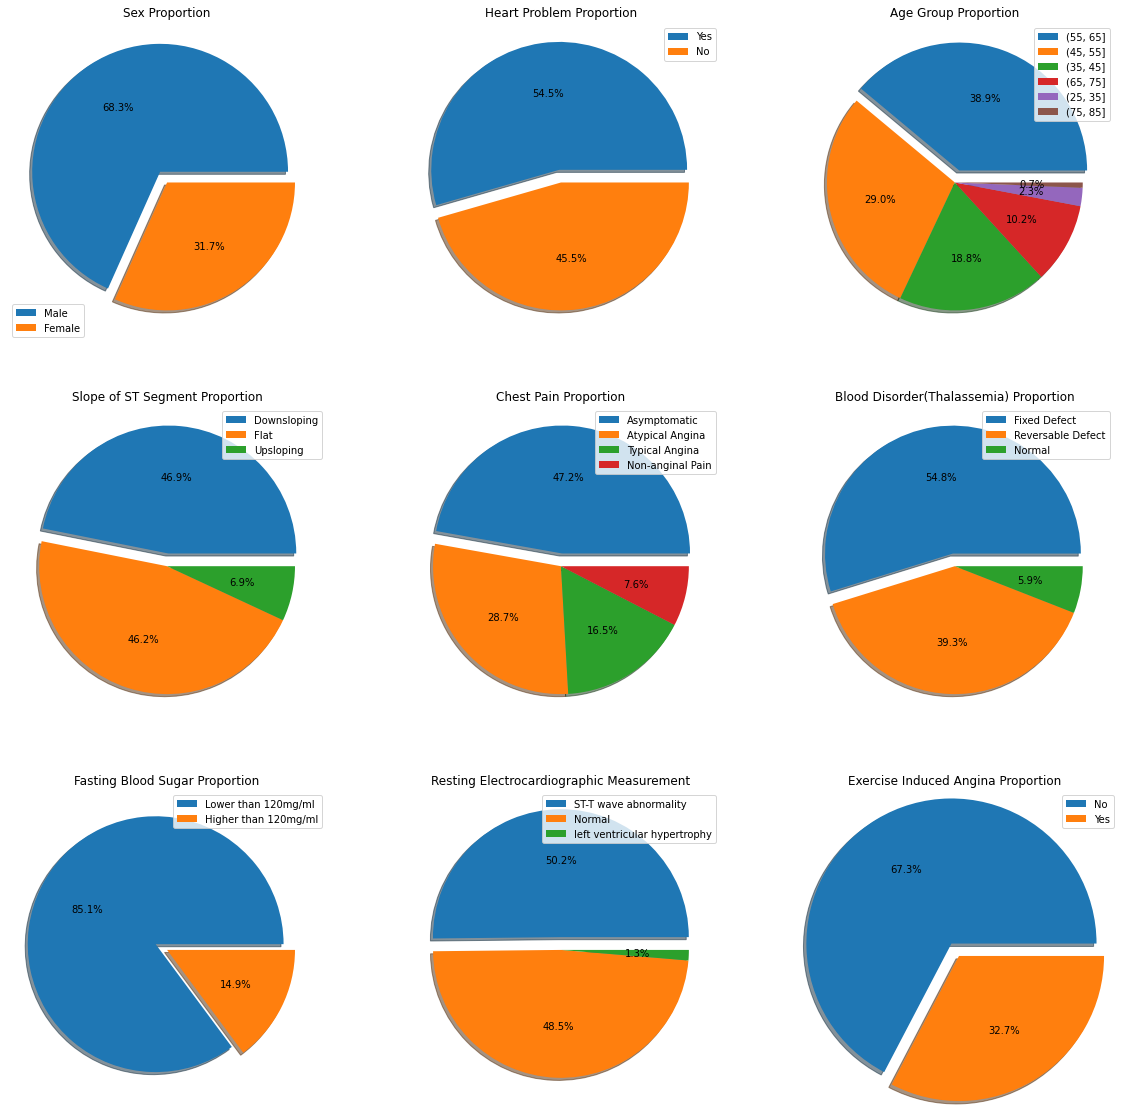

In [7]:
sex_proportion = df['sex'].value_counts(normalize=True).reset_index()
heart_problem_proportion = df['heart_problem'].value_counts(normalize=True).reset_index()
age_group_proportion = df['age'].value_counts(normalize=True).reset_index()
slope_proportion = df['slope'].value_counts(normalize=True).reset_index()
cp_proportion = df['cp'].value_counts(normalize=True).reset_index()
thal_proportion = df['thal'].value_counts(normalize=True).reset_index()
fbs_proportion = df['fbs'].value_counts(normalize=True).reset_index()
restecg_proportion = df['restecg'].value_counts(normalize=True).reset_index()
exang_proportion = df['exang'].value_counts(normalize=True).reset_index()

proportions = [sex_proportion, heart_problem_proportion, age_group_proportion, 
               slope_proportion, cp_proportion, thal_proportion,
               fbs_proportion, restecg_proportion, exang_proportion]
titles = ['Sex Proportion', 'Heart Problem Proportion', 'Age Group Proportion',
         'Slope of ST Segment Proportion', 'Chest Pain Proportion', 'Blood Disorder(Thalassemia) Proportion',
         'Fasting Blood Sugar Proportion', 'Resting Electrocardiographic Measurement', 'Exercise Induced Angina Proportion']

plt.figure(figsize=(20, 20))
for i, element in enumerate(zip(proportions, titles)):
    plt.subplot(3, 3, i+1)
    proportion, title = element
    explode = [0.1] + [0] * (len(proportion)-1)
    plt.pie(proportion.iloc[:, 1], autopct='%1.1f%%', shadow = True, explode = explode)
    plt.title(title)
    plt.legend(proportion.iloc[:, 0])
plt.axis('equal')
plt.show()

In [8]:
problem_with_heart_df = df[df['heart_problem'] == 'Yes']
print(problem_with_heart_df)

          age     sex                cp  trestbps  chol                   fbs  \
0    (55, 65]    Male  Non-anginal Pain       145   233  Higher than 120mg/ml   
1    (35, 45]    Male   Atypical Angina       130   250   Lower than 120mg/ml   
2    (35, 45]  Female    Typical Angina       130   204   Lower than 120mg/ml   
3    (55, 65]    Male    Typical Angina       120   236   Lower than 120mg/ml   
4    (55, 65]  Female      Asymptomatic       120   354   Lower than 120mg/ml   
..        ...     ...               ...       ...   ...                   ...   
160  (55, 65]    Male    Typical Angina       120   240   Lower than 120mg/ml   
161  (45, 55]  Female    Typical Angina       132   342   Lower than 120mg/ml   
162  (35, 45]    Male    Typical Angina       120   157   Lower than 120mg/ml   
163  (35, 45]    Male   Atypical Angina       138   175   Lower than 120mg/ml   
164  (35, 45]    Male   Atypical Angina       138   175   Lower than 120mg/ml   

                   restecg 

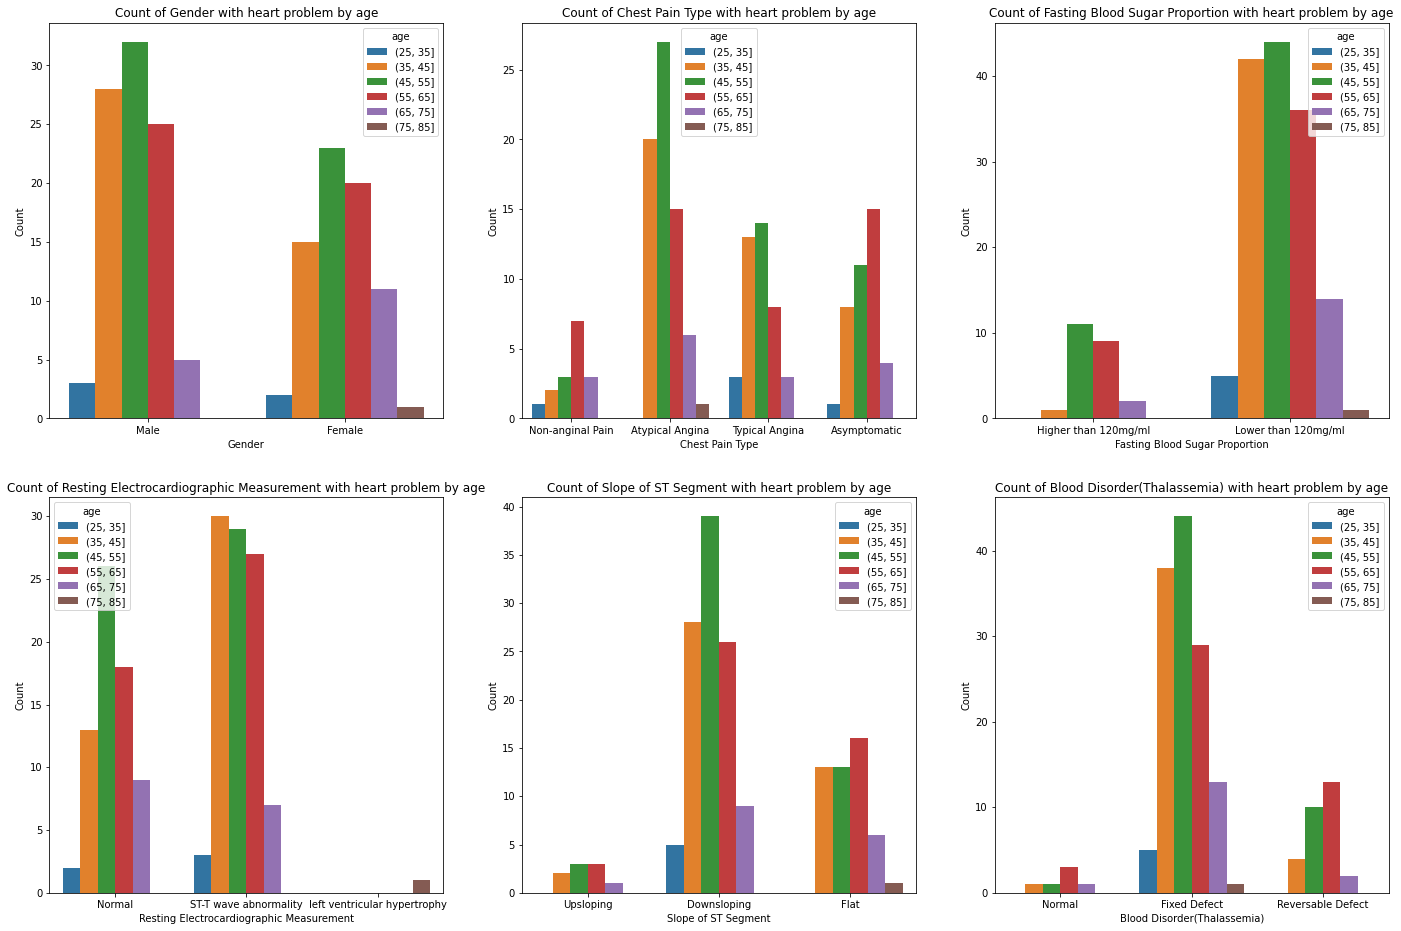

In [9]:
columns = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal']
titles = ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar Proportion', 
          'Resting Electrocardiographic Measurement', 'Slope of ST Segment', 'Blood Disorder(Thalassemia)']

plt.figure(figsize=(24, 16))
for i, info in enumerate(zip(columns, titles)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=problem_with_heart_df[info[0]], hue=problem_with_heart_df['age'])
    plt.xlabel(info[1])
    plt.ylabel('Count')
    plt.title(f'Count of {info[1]} with heart problem by age')
plt.show()


/home/vladimir/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vladimir/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ModeResult(mode=array([162]), count=array([8]))
ModeResult(mode=array([132]), count=array([6]))


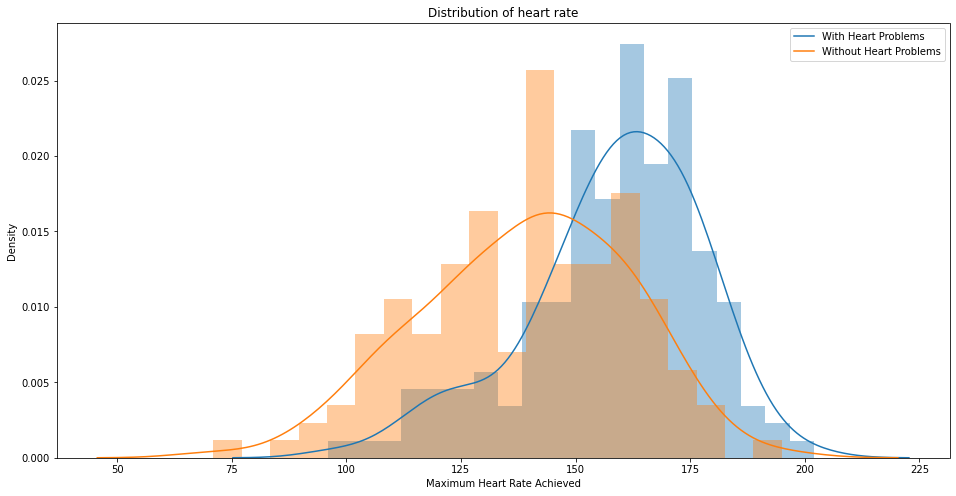

In [34]:
#Distribution of Maximum Heart Rate Achieved in people who have heart problem and who don't
plt.figure(figsize=(16, 8))
sns.distplot(df[df['heart_problem'] == 'Yes']['thalach'], bins=20)
print(stats.mode(df[df['heart_problem'] == 'Yes']['thalach']))

sns.distplot(df[df['heart_problem'] == 'No']['thalach'], bins=20)
print(stats.mode(df[df['heart_problem'] == 'No']['thalach']))
plt.xlabel('Maximum Heart Rate Achieved')
plt.title('Distribution of heart rate')
plt.legend(['With Heart Problems', 'Without Heart Problems'])
plt.show()

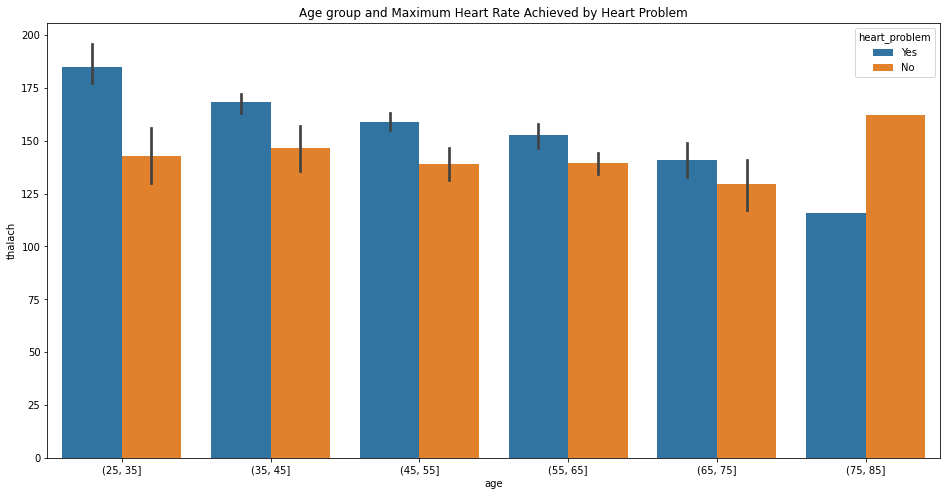

In [11]:
#Age Vs Thalach
plt.figure(figsize=(16, 8))
sns.barplot(x='age', y='thalach', data=df, hue='heart_problem')
plt.title('Age group and Maximum Heart Rate Achieved by Heart Problem')
plt.show()

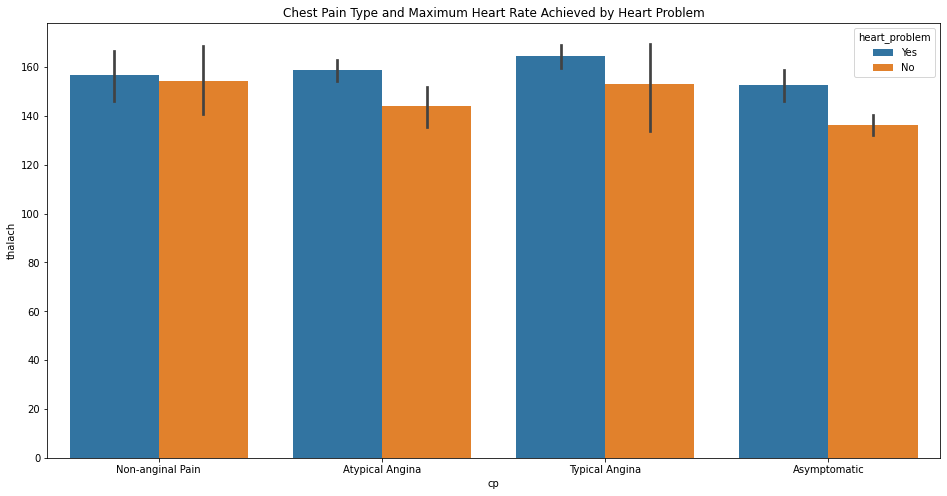

In [12]:
#Chest Pain type and Thalach
plt.figure(figsize=(16, 8))
sns.barplot(x='cp', y='thalach', data=df, hue='heart_problem')
plt.title('Chest Pain Type and Maximum Heart Rate Achieved by Heart Problem')
plt.show()

/home/vladimir/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vladimir/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


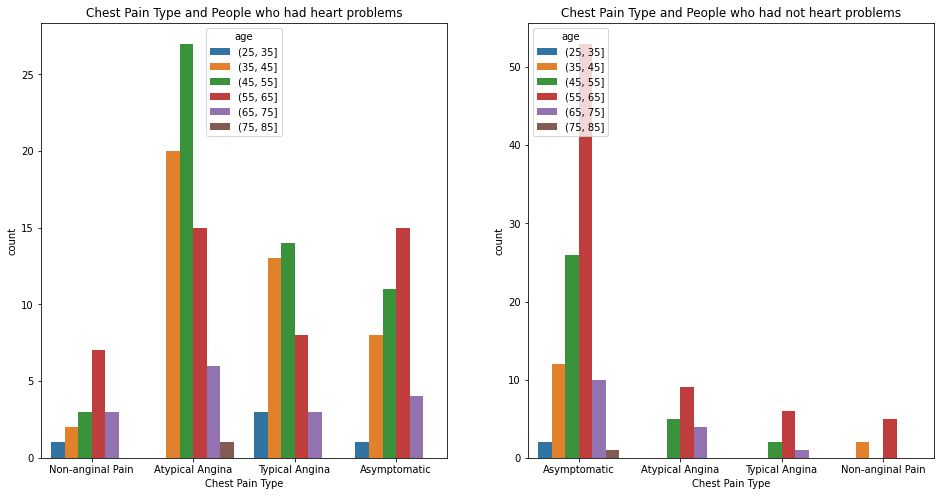

In [13]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title('Chest Pain Type and People who had heart problems')
sns.countplot('cp', hue='age', data=df[df['heart_problem'] == 'Yes'])
plt.xlabel('Chest Pain Type')

plt.subplot(1, 2, 2)
plt.title('Chest Pain Type and People who had not heart problems')
sns.countplot('cp', hue='age', data=df[df['heart_problem'] == 'No'])
plt.xlabel("Chest Pain Type")

plt.show()

In [14]:
#Does sex has influence on heart problem?
sex_vs_disease_crosstab = pd.crosstab(df['sex'], df['heart_problem'])
print(sex_vs_disease_crosstab)
chi2, sex_pval, dof, exp = stats.chi2_contingency(sex_vs_disease_crosstab)
print(sex_pval)

heart_problem   No  Yes
sex                    
Female          24   72
Male           114   93
1.8767776216941503e-06


In [15]:
#Does age has influence on heart problem?
age_vs_disease_crosstab = pd.crosstab(df['age'], df['heart_problem'])
print(age_vs_disease_crosstab)
chi2, age_pval, dof, exp = stats.chi2_contingency(age_vs_disease_crosstab)
print(age_pval)

heart_problem  No  Yes
age                   
(25, 35]        2    5
(35, 45]       14   43
(45, 55]       33   55
(55, 65]       73   45
(65, 75]       15   16
(75, 85]        1    1
8.85582613981961e-05


In [16]:
#Does chest pain type can say something about heart disease?
cp_vs_disease_crosstab = pd.crosstab(df['cp'], df['heart_problem'])
print(cp_vs_disease_crosstab)
chi2, cp_pval, dof, exp = stats.chi2_contingency(cp_vs_disease_crosstab)
print(cp_pval<0.05)

heart_problem      No  Yes
cp                        
Asymptomatic      104   39
Atypical Angina    18   69
Non-anginal Pain    7   16
Typical Angina      9   41
True


In [32]:
#mean thalach of age groups and heart proble
mean_thalach_by_age_group = df.groupby(['age', 'heart_problem'])['thalach'].mean()
print(mean_thalach_by_age_group)

age       heart_problem
(25, 35]  No               143.000000
          Yes              184.800000
(35, 45]  No               146.571429
          Yes              168.162791
(45, 55]  No               138.818182
          Yes              158.963636
(55, 65]  No               139.301370
          Yes              152.777778
(65, 75]  No               129.733333
          Yes              141.125000
(75, 85]  No               162.000000
          Yes              116.000000
Name: thalach, dtype: float64


In [18]:
#mean trestbps of age groups and heart proble
mean_trestbps_by_age_group = df.groupby(['age', 'heart_problem'])['trestbps'].mean()
print(mean_trestbps_by_age_group)

age       heart_problem
(25, 35]  No               123.000000
          Yes              125.200000
(35, 45]  No               123.142857
          Yes              124.139535
(45, 55]  No               131.757576
          Yes              127.600000
(55, 65]  No               136.684932
          Yes              134.844444
(65, 75]  No               141.733333
          Yes              134.062500
(75, 85]  No               125.000000
          Yes              140.000000
Name: trestbps, dtype: float64


In [19]:
#is difference in thalach significant?
no_problem_with_heart_df = df[df['heart_problem'] == 'No']
fstat, pval = stats.ttest_ind(problem_with_heart_df['thalach'], no_problem_with_heart_df['thalach'])
print(pval < 0.05)

True


In [20]:
#is trestbps a strong deviation in people with heart disease from people who do not have heart problems?
no_problem_with_heart_df = df[df['heart_problem'] == 'No']
fstat, pval = stats.ttest_ind(problem_with_heart_df['trestbps'], no_problem_with_heart_df['trestbps'])
print(pval < 0.05)

True
